In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scenarios
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set_context(context="notebook")
plt.rcParams["figure.dpi"] = 300

### Compute Pareto frontier for aggregated system

In [4]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedBaseline_MinCost = scenarios.build_complete_system("aggregated_baseline", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedBaseline_MinCost, "MinimizeCost")
baseline_cost = aggregatedBaseline_MinCost.totalCost.value
print(f"Baseline cost: {baseline_cost}")

Baseline cost: 11029176.038974134


In [5]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedBaseline_MinEmissions = scenarios.build_complete_system("aggregated_baseline", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedBaseline_MinEmissions, "MinimizeEmissions")
baseline_emissions = aggregatedBaseline_MinEmissions.totalEmissions.value
print(f"Baseline emissions: {baseline_emissions}")

Baseline emissions: 5.796440877596117e-09


In [6]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedGas_MinCost = scenarios.build_gas_only_system("aggregated_gas", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedGas_MinCost, "MinimizeCost")
gas_only_cost = aggregatedGas_MinCost.totalCost.value
print(f"Gas only scenario cost: {gas_only_cost}")

Gas only scenario cost: 17159305.072888896


In [7]:
aggregated = ["site1", "site2", "site3", "site4", "site5"]
aggregatedGas_MinEmissions = scenarios.build_gas_only_system("aggregated_gas", directAccess=False, site=aggregated)
scenarios.run_scenario(aggregatedGas_MinEmissions, "MinimizeEmissions")
gas_only_emissions = aggregatedGas_MinEmissions.totalEmissions.value
print(f"Gas only scenario emissions: {gas_only_emissions}")

Gas only scenario emissions: 53527567.643337056


In [378]:
site2 = "site2"
site2Baseline_MinCost = scenarios.build_complete_system("site2_baseline", directAccess=False, site=site2)
scenarios.run_scenario(site2Baseline_MinCost, "MinimizeCost")
baseline_cost = site2Baseline_MinCost.totalCost.value
print(f"Baseline cost: {baseline_cost}")

Baseline cost: 2160939.3483095206


In [71]:
site2 = "site2"
site2Baseline_MinEmissions = scenarios.build_complete_system("site2_baseline", directAccess=False, site=site2)
scenarios.run_scenario(site2Baseline_MinEmissions, "MinimizeEmissions")
baseline_emissions = site2Baseline_MinEmissions.totalEmissions.value
print(f"Baseline emissions: {baseline_emissions}")

Baseline emissions: 7.421122680121874e-10


In [72]:
site2 = "site2"
site2Gas_MinCost = scenarios.build_gas_only_system("site2_gas", directAccess=False, site=site2)
scenarios.run_scenario(site2Gas_MinCost, "MinimizeCost")
gas_only_cost = site2Gas_MinCost.totalCost.value
print(f"Gas only scenario cost: {gas_only_cost}")

Gas only scenario cost: 3444151.7717840318


In [73]:
site2 = "site2"
site2Gas_MinEmissions = scenarios.build_gas_only_system("site2_gas", directAccess=False, site=site2)
scenarios.run_scenario(site2Gas_MinEmissions, "MinimizeEmissions")
gas_only_emissions = site2Gas_MinEmissions.totalEmissions.value
print(f"Gas only scenario emissions: {gas_only_emissions}")

Gas only scenario emissions: 10574364.036246162


## Maia

In [ ]:
n_per_axis = 2
# Create values between baseline_cost and gas_only_cost
costCaps_to_try = np.linspace(baseline_cost, gas_only_cost, n_per_axis)
# Create values between baseline_emissions and gas_only_emissions
emissionsCaps_to_try = np.linspace(baseline_emissions, gas_only_emissions, n_per_axis)

print(costCaps_to_try)
print(emissionsCaps_to_try)

In [ ]:
# Try all scenarios of single obective optimization
allCosts = []
allEmissions = []
# Minimize cost subject to emissions cap
for emissionsCap in emissionsCaps_to_try:
    scenario = scenarios.build_complete_system("aggregated_MinCost_EmissionCap{}".format(emissionsCap), directAccess=False, site=aggregated)
    scenarios.run_scenario(scenario, "MinimizeCostWithEmissionsCap", emissionsCap=emissionsCap, save=False)
    allCosts.append(scenario.totalCost.value)
    allEmissions.append(scenario.totalEmissions.value)
# Minimize emissions subject to cost cap
for costCap in costCaps_to_try:
    scenario = scenarios.build_complete_system("aggregated_MinEmissions_CostCap{}".format(costCap), directAccess=False, site=aggregated)
    scenarios.run_scenario(scenario, "MinimizeEmissionsWithCostCap", costCap=costCap, save=False)
    allCosts.append(scenario.totalCost.value)
    allEmissions.append(scenario.totalEmissions.value)

In [ ]:
# Generate Pareto frontier by finding non-dominated points
pareto_frontier = []
for i in range(len(allCosts)):
    dominated = False
    for j in range(len(allCosts)):
        if allCosts[j] <= allCosts[i] and allEmissions[j] <= allEmissions[i] and i != j:
            dominated = True
            break
    if not dominated:
        pareto_frontier.append((allCosts[i], allEmissions[i]))
pareto_frontier = np.array(pareto_frontier)

# Sort by cost
pareto_frontier = pareto_frontier[np.argsort(pareto_frontier[:,0])]


# Aramis

In [5]:
site2Baseline = scenarios.build_complete_system("site2_baseline", directAccess=False, site="site2")
scenarios.run_scenario(site2Baseline, "MinimizeCost")
baseline_cost = site2Baseline.totalCost.value

In [7]:
baseline_cost

2155293.6011893298

In [23]:
site2Gas = scenarios.build_gas_only_system("site2_gas", directAccess=False, site="site2")
scenarios.run_scenario(site2Gas, "MinimizeCost")
gas_only_cost = site2Gas.totalCost.value

In [24]:
site2Baseline = scenarios.build_complete_system("site2_baseline", directAccess=False, site="site2")
problem = site2Baseline.getModel("emissions", costCap=gas_only_cost)

In [25]:
costs1 = np.linspace(baseline_cost+10, 0.65*gas_only_cost, 5)
costs2 = np.linspace(0.65*gas_only_cost, 1.05*gas_only_cost, 6)[1:]
costs = np.concatenate((costs1, costs2))

In [26]:
emissions = []
for cost in costs:
     problem.param_dict['costCap'].value = cost
     problem.solve(solver="MOSEK", verbose=True, mosek_params={'MSK_IPAR_INTPNT_MAX_ITERATIONS': 1000})
     print(f"cost: {np.round(site2Baseline.totalCost.value/1e6, 3)} M$, status: {problem.status}, emissions: {np.round(site2Baseline.totalEmissions.value/1e3, 3)} ton CO2")
     print(f"costCap: {np.round(problem.param_dict['costCap'].value/1e6, 3)} M$")
     emissions.append(site2Baseline.totalEmissions.value)

                                     CVXPY                                     
                                     v1.5.1                                    
(CVXPY) Jun 01 05:35:39 PM: Your problem has 315370 variables, 560648 constraints, and 27 parameters.
(CVXPY) Jun 01 05:35:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 01 05:35:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 01 05:35:39 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 01 05:35:39 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Jun 01 05:35:39 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK


(CVXPY) Jun 01 05:35:39 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 01 05:35:39 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 01 05:35:39 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 01 05:35:40 PM: Applying reduction MOSEK
(CVXPY) Jun 01 05:35:40 PM: Finished problem compilation (took 9.349e-01 seconds).
(CVXPY) Jun 01 05:35:40 PM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jun 01 05:35:40 PM: Invoking solver MOSEK  to obtain a solution.


(CVXPY) Jun 01 05:35:41 PM: Problem
(CVXPY) Jun 01 05:35:41 PM:   Name                   :                 
(CVXPY) Jun 01 05:35:41 PM:   Objective sense        : maximize        
(CVXPY) Jun 01 05:35:41 PM:   Type                   : LO (linear

In [27]:
emissions = np.array(emissions)
pareto_frontier = np.vstack((costs, emissions)).T
energyCons = (site2Baseline.powerLoad.sum() + site2Baseline.heatLoad.sum())/1000
pareto_frontier = pareto_frontier / energyCons

## Plots

In [28]:
sns.set_context(context="talk")
plt.rcParams["figure.dpi"] = 300

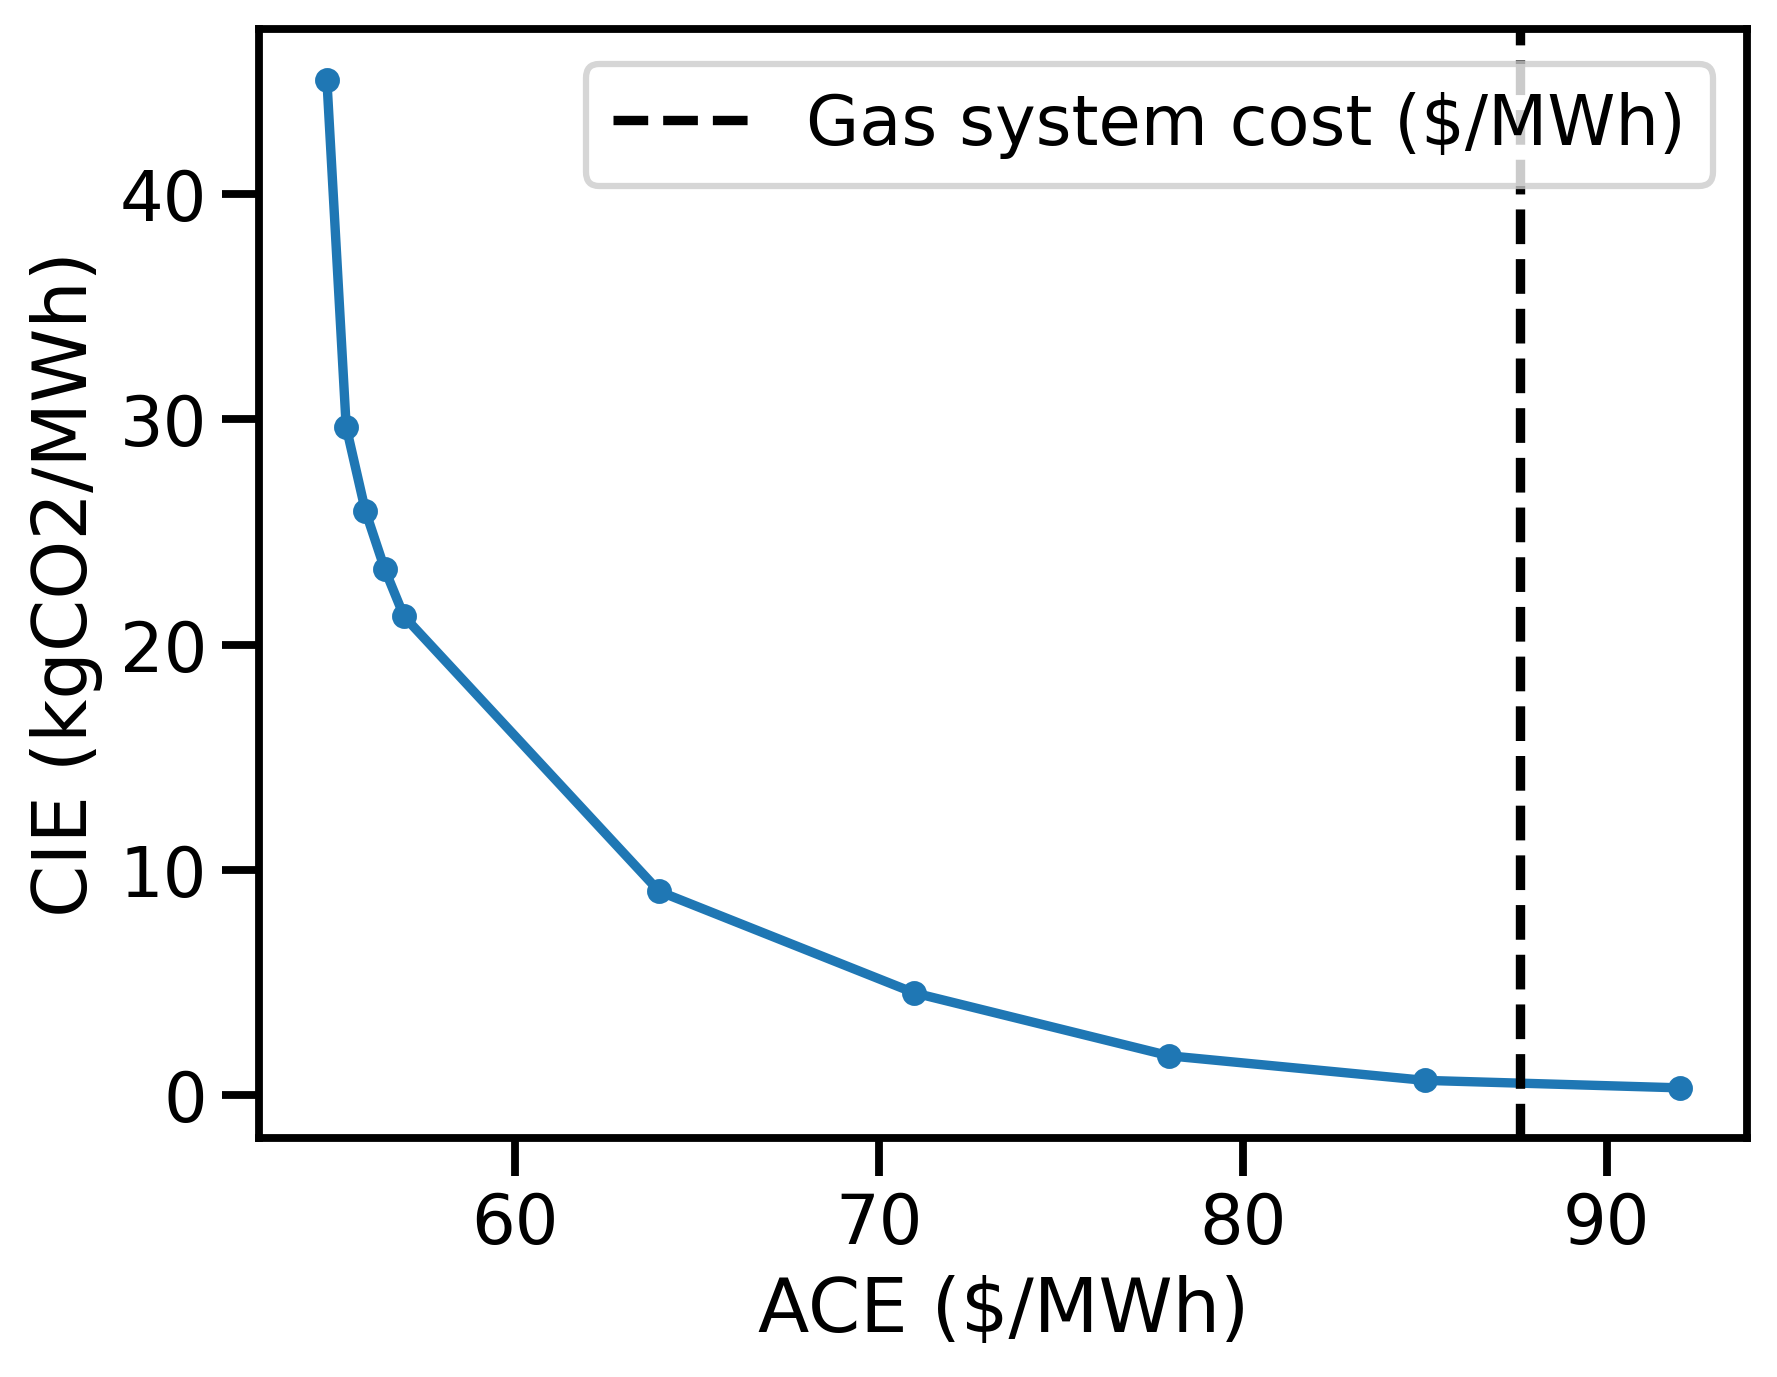

In [29]:
# Plot the results: cost vs emissions
plt.scatter(costs/ energyCons, emissions/ energyCons, s=20)
# Link the points of the Pareto frontier with a blue line
plt.plot(pareto_frontier[:,0], pareto_frontier[:,1])
plt.xlabel("ACE ($/MWh)")
plt.ylabel("CIE (kgCO2/MWh)")
plt.axvline(x=gas_only_cost/energyCons, color='black', linestyle='--', label='Gas system cost ($/MWh)')
plt.legend()
plt.show();

In [30]:
reductionToBaseline = - (emissions[1:] - emissions[0])
reductionToBaselinePercent = reductionToBaseline / emissions[0] * 100
incrementalReduction = - (emissions[1:] - emissions[:-1])
incrementalCost = costs[1:] - costs[:-1]
marginalCost = incrementalCost / incrementalReduction

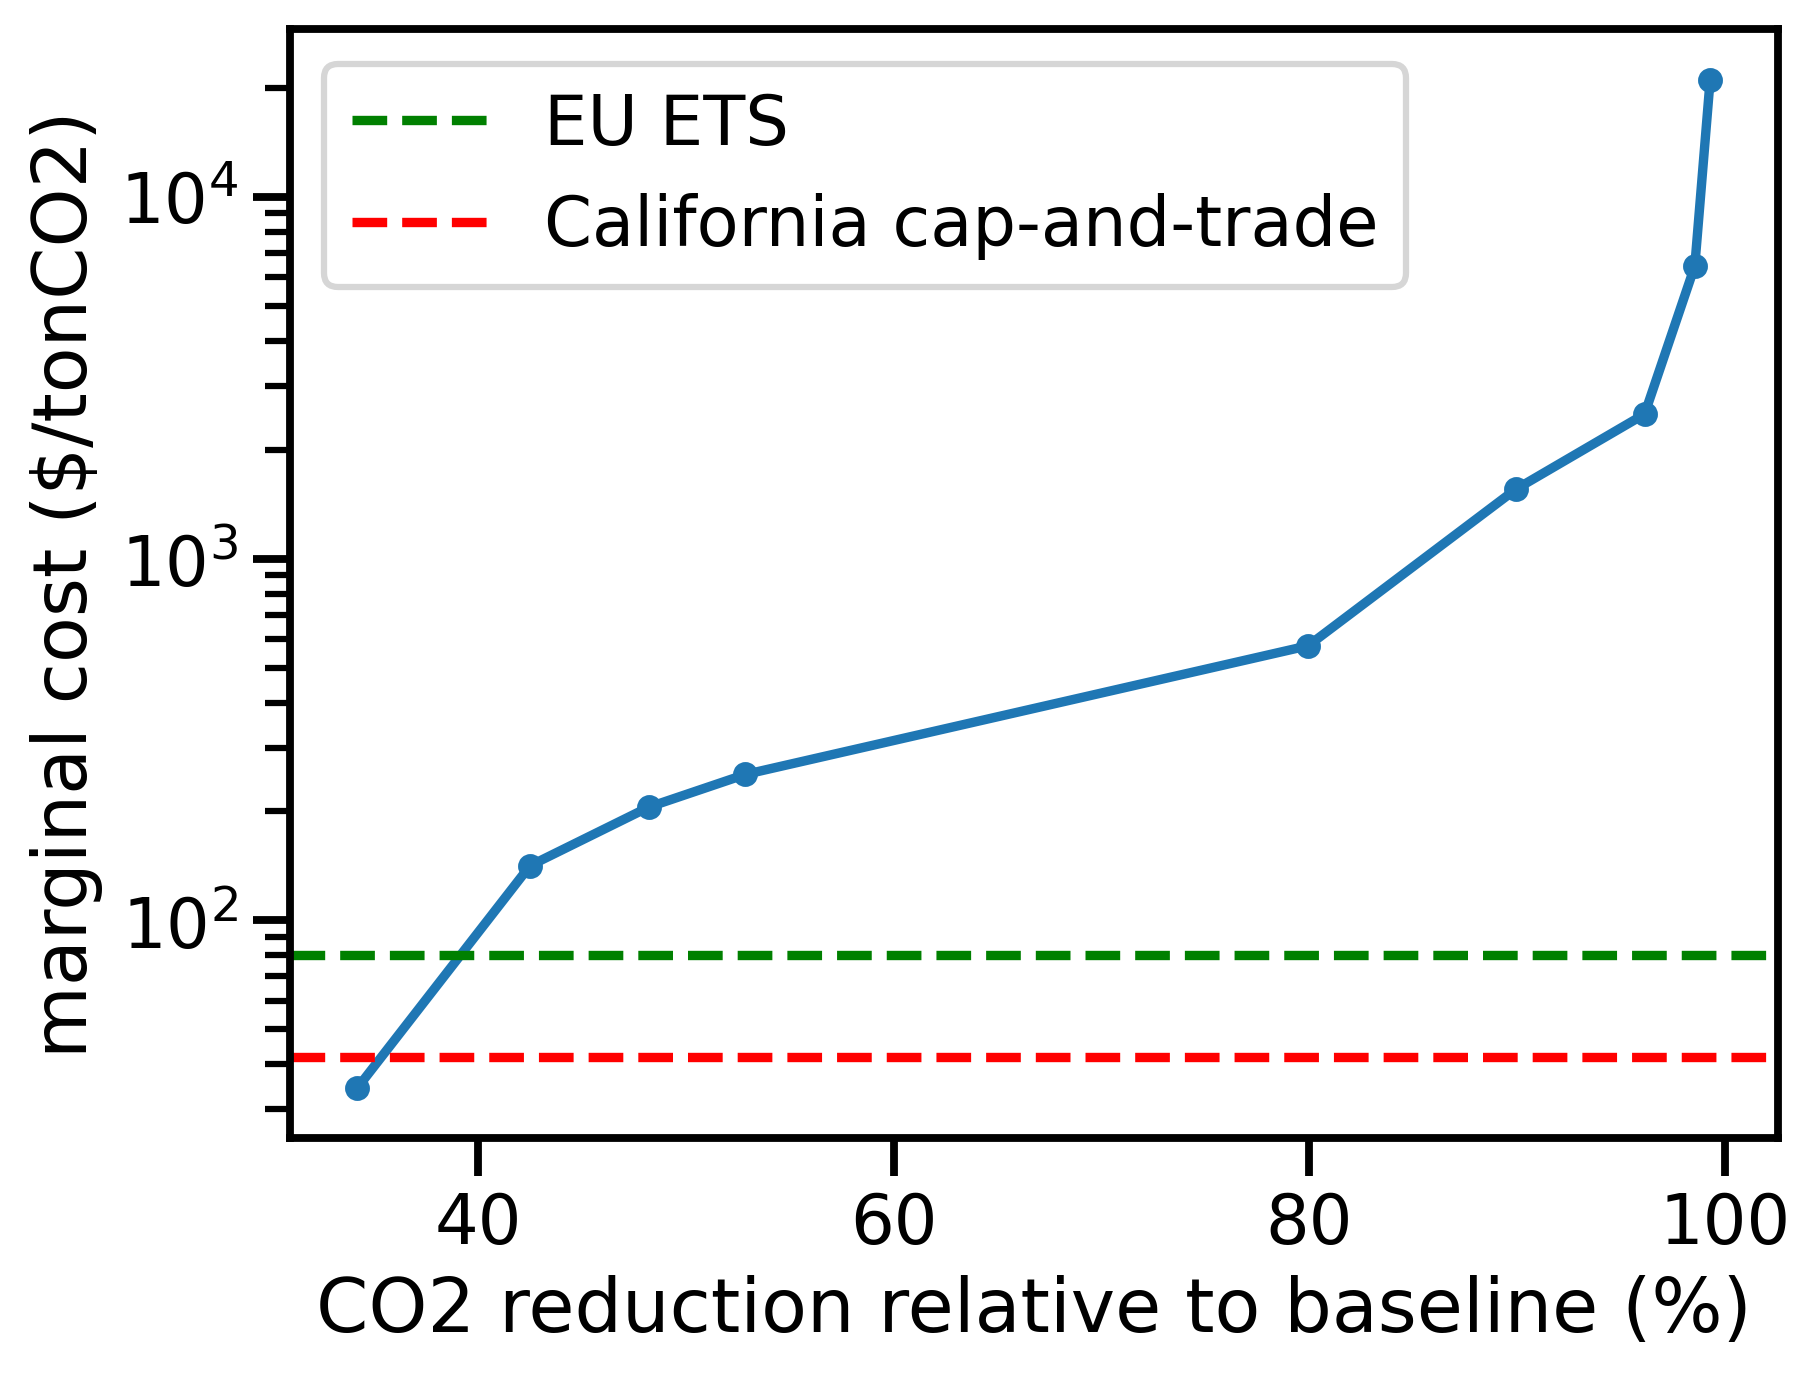

In [31]:
plt.scatter(reductionToBaselinePercent, marginalCost*1000, s=20)
# Link the points of the Pareto frontier with a blue line
plt.plot(reductionToBaselinePercent, marginalCost*1000)
plt.xlabel("CO2 reduction relative to baseline (%)")
plt.ylabel("marginal cost ($/tonCO2)")
plt.yscale("log")
plt.axhline(y=80, color='g', linestyle='--', label='EU ETS')
plt.axhline(y=42, color='r', linestyle='--', label='California cap-and-trade')
plt.legend()
plt.show();